Goals: Test Birkhoff Ergodic Theorem

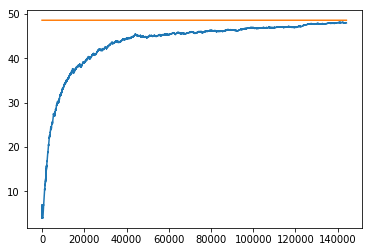

In [6]:
side = 10
particle_radius = 2
scatter_radius_crit = (side - particle_radius)/2**(1/2) - particle_radius
scatter_radius = scatter_radius_crit * 0.9

num_walls = 5
hole = 3
max_steps = 10000000
seed = None

%run -i Sinai_billiard_defs.py

x = 0.0
y = -y_range
speed = 1.0
theta = np.pi/4*1.0001
result = run_trial(x, y, speed, theta, max_escapes = 3000)

# result = run_trial(max_escapes = 100)

escapes = result[4]
collisions = np.arange(len(escapes))
with np.errstate(all='ignore'):
    ce_ratio = collisions / escapes

plt.plot(ce_ratio)
plt.plot(np.full_like(ce_ratio,bdy_hole_ratio))
plt.show()

In [6]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
def draw_hist(pos, t=None, ce_ratio=None):
    dpos = np.diff(pos,axis=0)
    max_steps = dpos.shape[0]
    if t is None:
        t = np.arange(max_steps)
    
    h = hole_range
    x = x_range
    y = y_range
    side_bdy = np.array([(h,-y), (x,-y), (x,y), (-x,y), (-x,-y), (-h,-y)])
    thetas = np.linspace(0, 2*np.pi, 100)
    scatter_bdy = scatter_range * np.array([np.cos(thetas), np.sin(thetas)]).T

    def draw(steps=1):
        print('steps = {}, time = {:.2f}'.format(steps, t[steps]))
        if ce_ratio is not None:
            print('boundary length / hole length = {:.2f}, collisions / escapes = {:.2f}'.format(bdy_hole_ratio, ce_ratio[steps]))
        fig, ax = plt.subplots(figsize=[5,5])
        ax.plot(side_bdy[:,0], side_bdy[:,1])
        ax.fill(scatter_bdy[:,0], scatter_bdy[:,1])
        ax.quiver(pos[:steps,0], pos[:steps,1], dpos[:steps,0], dpos[:steps,1], angles='xy', scale_units='xy', scale=1)
        ax.set_aspect('equal')
        plt.show()

    widgets.interact(draw,steps=(1,max_steps));
    
draw_hist(pos=result[2], t=result[1], ce_ratio=ce_ratio)

A Jupyter Widget